



Epoch 1/5


1875/1875 [==============================] - 19s 9ms/step - loss: 0.1505 - accuracy: 0.9528 - val_loss: 0.0570 - val_accuracy: 0.9815
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0381 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0350 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0285 - val_accuracy: 0.9910
313/313 - 1s - loss: 0.0285 - accuracy: 0.9910 - 1s/epoch - 4ms/step

Test accuracy: 0.9909999966621399
313/313 [==============================] - 2s 4ms/step


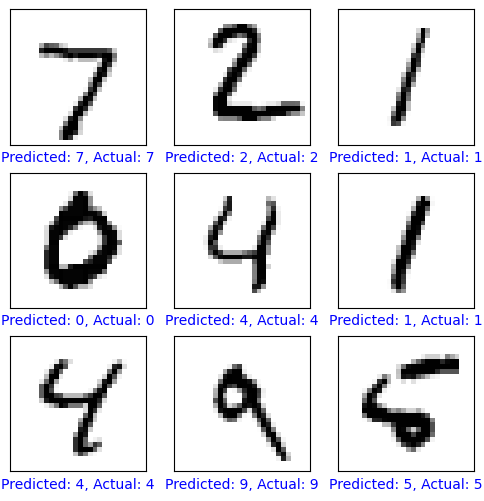

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension (needed for convolutional layers)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Display a sample image from the test set along with its predicted label
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Predicted: {predicted_label}, Actual: {true_label}", color=color)

predictions = model.predict(test_images)
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()
